In [2]:
import os
folder_path = 'dog_vs_cat'

In [3]:
files = os.listdir(folder_path)
print(files)

['test', 'train']


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
#generators ->a special type of function or object that yields data in batches rather than loading everything into memory at once.

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(folder_path, 'train'),
    labels='inferred',        
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(folder_path, 'test'),
    labels='inferred',        
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

In [9]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  


C:\Users\manis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
import time
start=time.time()
history=model.fit(train_ds,epochs=5,validation_data=validation_ds)
end=time.time()
elapsed_time = end - start
print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2492s 4s/step - accuracy: 0.6276 - loss: 0.6320 - val_accuracy: 0.7336 - val_loss: 0.5250
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2183s 3s/step - accuracy: 0.7610 - loss: 0.4873 - val_accuracy: 0.7890 - val_loss: 0.4521
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16487s 26s/step - accuracy: 0.8301 - loss: 0.3769 - val_accuracy: 0.7862 - val_loss: 0.5725
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1393s 2s/step - accuracy: 0.8864 - loss: 0.2612 - val_accuracy: 0.7982 - val_loss: 0.6660
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1800s 3s/step - accuracy: 0.9427 - loss: 0.1444 - val_accuracy: 0.7958 - val_loss: 0.7409
Time taken to fit the model: 24356.55 seconds


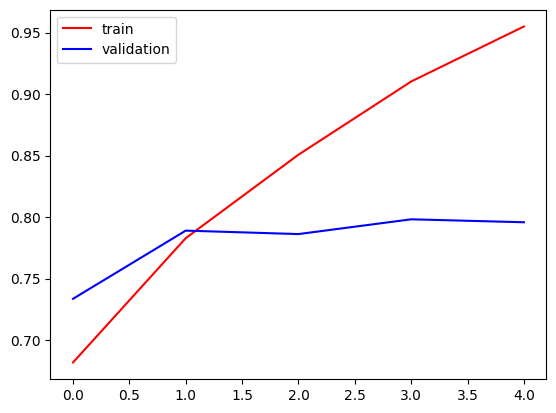

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

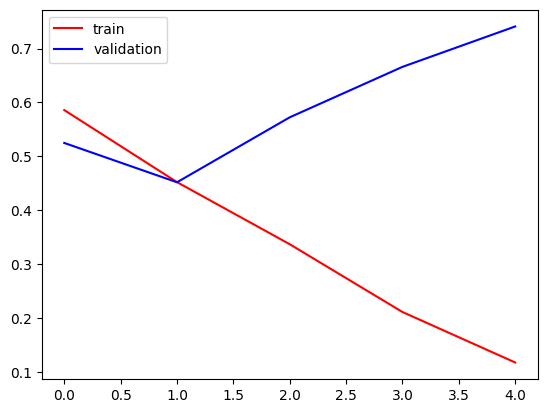

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img=cv2.imread('cat.jpg')

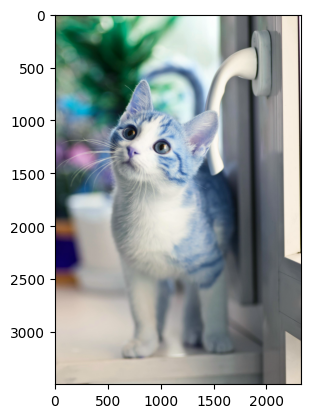

In [20]:
plt.imshow(test_img)

In [24]:
test_img=cv2.resize(test_img,(256,256))

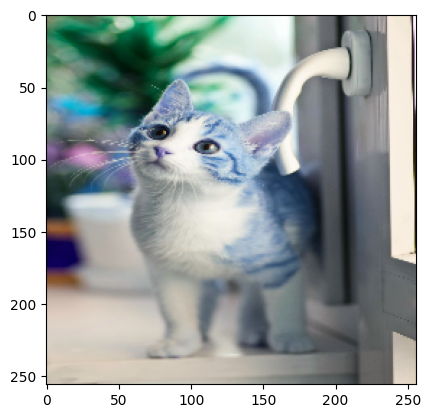

In [25]:
plt.imshow(test_img)

In [26]:
test_input=test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[1.217358e-36]], dtype=float32)

In [28]:
test_img=cv2.imread('dog.jpg')

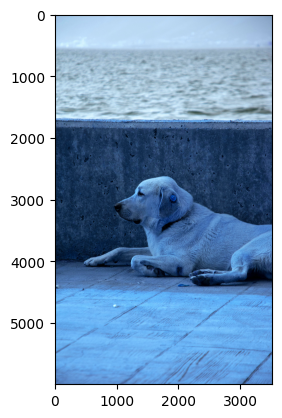

In [29]:
plt.imshow(test_img)

In [30]:
test_img=cv2.resize(test_img,(256,256))

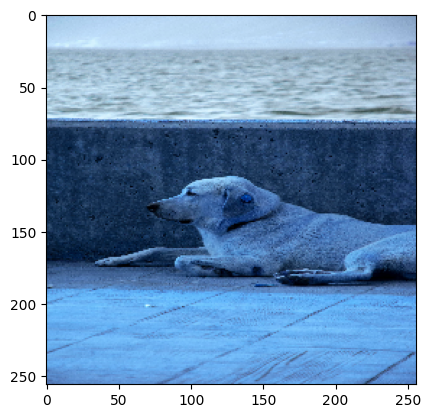

In [31]:
plt.imshow(test_img)

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)

In [37]:
model.predict(test_input)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


1.0

In [38]:
if model.predict(test_input)[0][0]>=1:
    print("Given image is Dog")
else:
    print("Given image is Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Given image is Dog


In [39]:
test_img=cv2.imread('cat1.jpg')

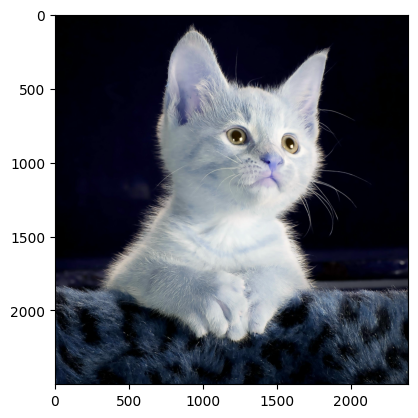

In [40]:
plt.imshow(test_img)

In [41]:
test_img=cv2.resize(test_img,(256,256))

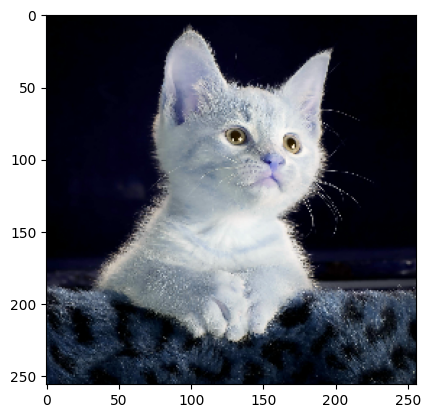

In [42]:
plt.imshow(test_img)

In [43]:
test_input=test_img.reshape((1,256,256,3))

In [44]:
if model.predict(test_input)[0][0]>=1:
    print("Given image is Dog")
else:
    print("Given image is Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Given image is Cat
